Import some important libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models


**Data**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each.

(https//www.cs.toronto.edu/~kriz/cifar.html)


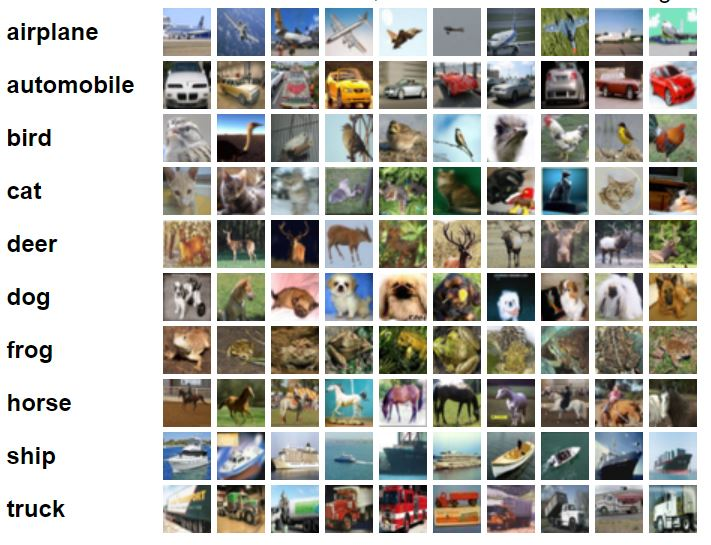

 Load  datasets

In [ ]:

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


170508288/170498071 [==============================] - 4s 0us/step


View the shape of our data

In [ ]:
print(f'Training shape {X_train.shape} ')
print(f'Test shape {X_test.shape}')

Training shape (50000, 32, 32, 3) 
Test shape (10000, 32, 32, 3)


**checking the labels**

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
#Accessing the first three label items
print(f'Shape of the training label{y_train[:3]} ,Shape of the test label  {y_test[:3]}')

Shape of the training label[[6]
 [9]
 [9]] ,Shape of the test label  [[3]
 [8]
 [8]]


The labels are in two dimesions . so the next step is to  to change it in to one dimesion using **tf.reshape** method

If one component of shape is the special value -1, the size of that dimension is computed so that the total size remains constant. In particular, a shape of [-1] flattens into 1-D. At most one component of shape can be -1.



In [ ]:
y_train = tf.reshape(y_train, [-1,])
y_test = tf.reshape(y_test, [-1,])

In [ ]:
y_train[:3]

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([6, 9, 9], dtype=uint8)>

**Visualization**

In [ ]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


View the first image

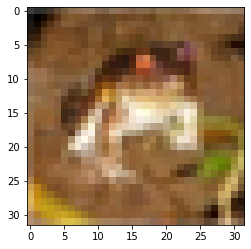

In [ ]:
plt.imshow(X_train[0])

View the image with it's name

In [ ]:
def view_img(feature, label, num):
    plt.imshow(feature[num])
    plt.xlabel(labels[label[num]])

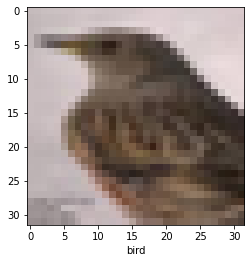

In [ ]:
view_img(X_train, y_train, 18)


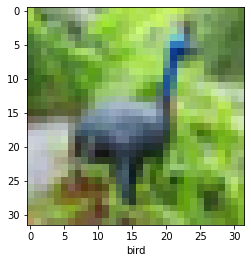

In [ ]:
#view another image
view_img(X_train, y_train, 6)

**Normalize the data**

The reason  normalizing training data is to solve the model learning challenge. We make sure that the various features have similar value ranges (feature scaling) so that gradient descents can converge faster.

 Here i'll normalize the data in the range of 0 and 1. First i'll check the original data range. It's expected to be 0 to 255

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

**Build the model**

In [ ]:
cnn =  models.Sequential([
                          layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
                          layers.MaxPooling2D((2,2)),

                          layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
                          layers.MaxPooling2D((2,2)),

                          layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
                          layers.MaxPooling2D((2,2)),  
                          layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
                          layers.MaxPooling2D((2,2)),                          
                          layers.Flatten(),
                          layers.Dense(200, activation='relu'),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dense(50, activation = 'relu'),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dense(10, activation = 'softmax')
])


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train the model**

In [20]:
history = cnn.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.1539 - accuracy: 0.9470
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.1508 - accuracy: 0.9490
Epoch 3/5
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1518 - accuracy: 0.9481
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.1549 - accuracy: 0.9484
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.1462 - accuracy: 0.9508


The model has 95% accuracy on training data.

In [21]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 11ms/step - loss: 1.8031 - accuracy: 0.6999


[1.8031039237976074, 0.6998999714851379]

The model has 69% accuracy on test data.

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:1]

array([[1.0478140e-06, 3.9316316e-08, 5.2198784e-10, 9.9203813e-01,
        6.1072797e-06, 6.8438584e-03, 1.6516645e-07, 1.6437285e-08,
        1.1104733e-03, 1.0063853e-07]], dtype=float32)

In [23]:
y_labels = []

for element in y_pred:
    y_labels.append( np.argmax(element))
y_labels[:4]

[3, 8, 1, 0]



```
# This is formatted as code
```

**Let's use the model to  predict some images**

Predict the first image.

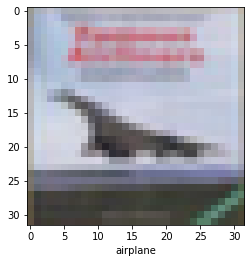

In [ ]:
#call view_img function
view_img(X_test, y_test,3)



On the first test our model is doing great

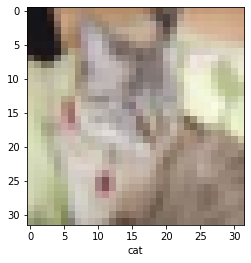

In [ ]:
#call view_img function
view_img(X_test, y_test,8)

Again our model is doing great

Predict the third  image


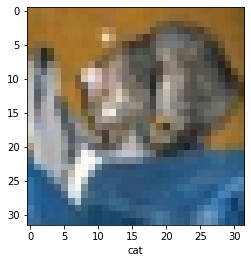

In [ ]:
#call view_img function
view_img(X_test, y_test,0)

In [ ]:
y_test[0]

<tf.Tensor: shape=(), dtype=uint8, numpy=3>

**Conclusion**: Our model is doing  great at classifying the images, but there is  a lot of work to be done **For example** Our model has an accuracy 95% on training and 69% on test data. 


This(95%) tells us the model is underfitting(underfitting means model is unable to capture the relationship between the input and output variables accurately). This may happen for a lot of reason. **For example**

 It maybe our model is too simple.

 To handle the underfitting problem:

 1. Get More training data.

 2.Increase the complexity the model.
 
 3.Increasing the training time, until cost function is minimised.

The 69% accuracy on the test set, This may indicate the model is overfitting

 To handle the overfitting problem:

1. Reduce the network's capacity by removing layers or reducing the number of elements in the hidden layers.

2. Apply regularization , which comes down to adding a cost to the loss function for large weights.

3. Use Dropout layers, which will randomly remove certain features by setting them to zero.